In [7]:
library(vegan)
library('BAT')

cwm(mqu_spe, mqu_traits, abund = TRUE, na.rm = FALSE)


ERROR: Error in functcomp(mqu_traits, mqu_spe, CWM = TRUE): could not find function "functcomp"


In [2]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [26]:
# Load required packages
library(NbClust)

# Get data

In [1]:
spe <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_spe.txt', row.names = 1)
env <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_env.txt', row.names = 1)
traits <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_traits.txt', row.names = 1)
loc <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_loc.txt')

In [12]:
spe <- t(spe)

In [13]:
head(spe)

,M01,M02,M03,Q01,Q02,Q03,U01,U02,U03
Acer.palmatum.var..pubescens,0.00,0.00,0.00,0.00,0.00,0,3.31,0,0.00
Acer.serrulatum,0.00,4.45,0.00,0.00,0.00,0,0.00,0,0.00
Ardisia.quinquegona,4.94,0.48,0.18,0.00,0.00,0,0.00,0,0.00
Barthea.barthei,0.00,0.00,0.00,0.16,0.00,0,0.00,0,6.83
Blastus.cochinchinensis,9.49,0.49,21.31,0.00,0.00,0,0.00,0,0.00
Camellia.brevistyla,0.00,0.00,0.00,0.00,0.41,0,0.00,0,0.00


# Compute chord distance matrix (abundance)


In [14]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix (euclidean distance of normalized species data)

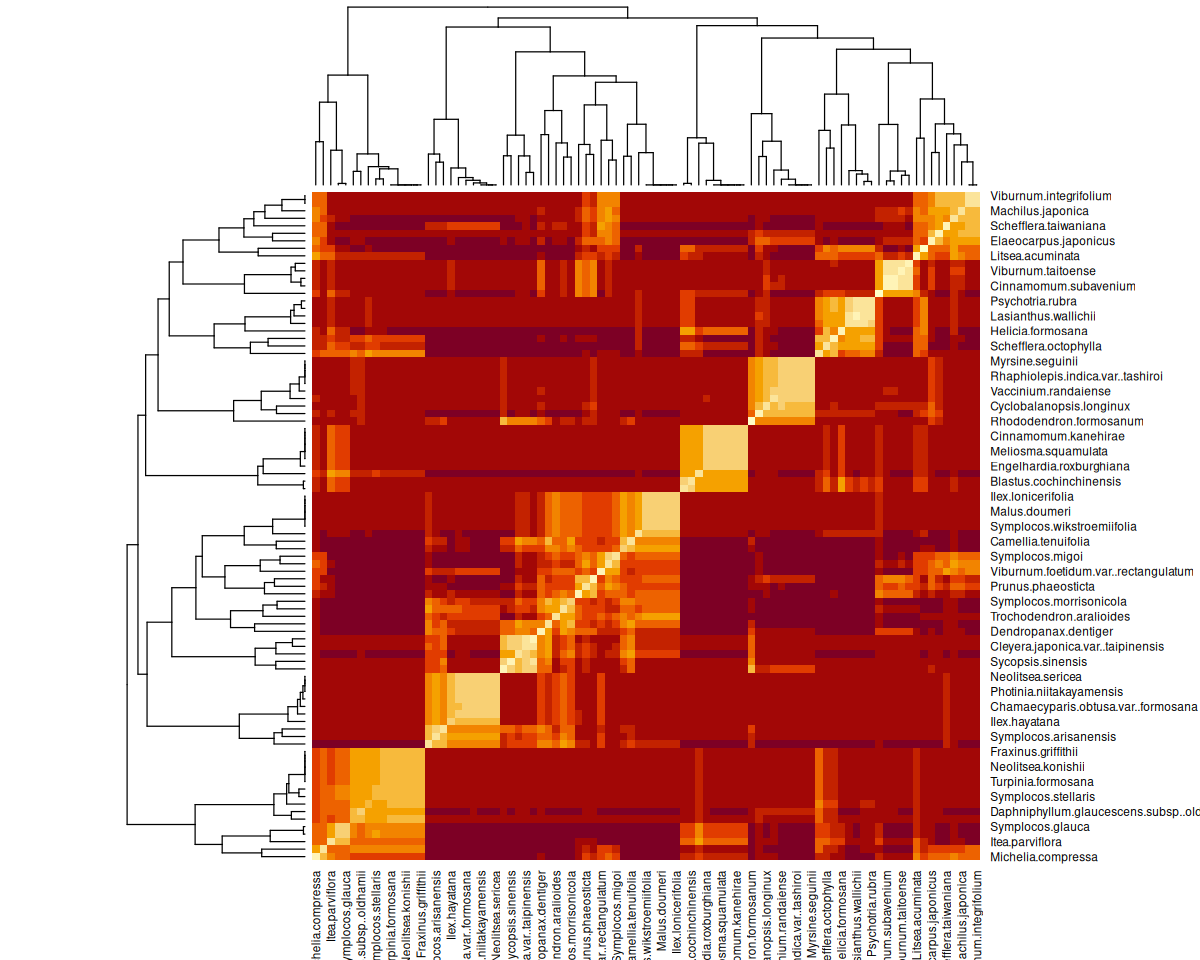

In [15]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe.ch))

# Ward linkage

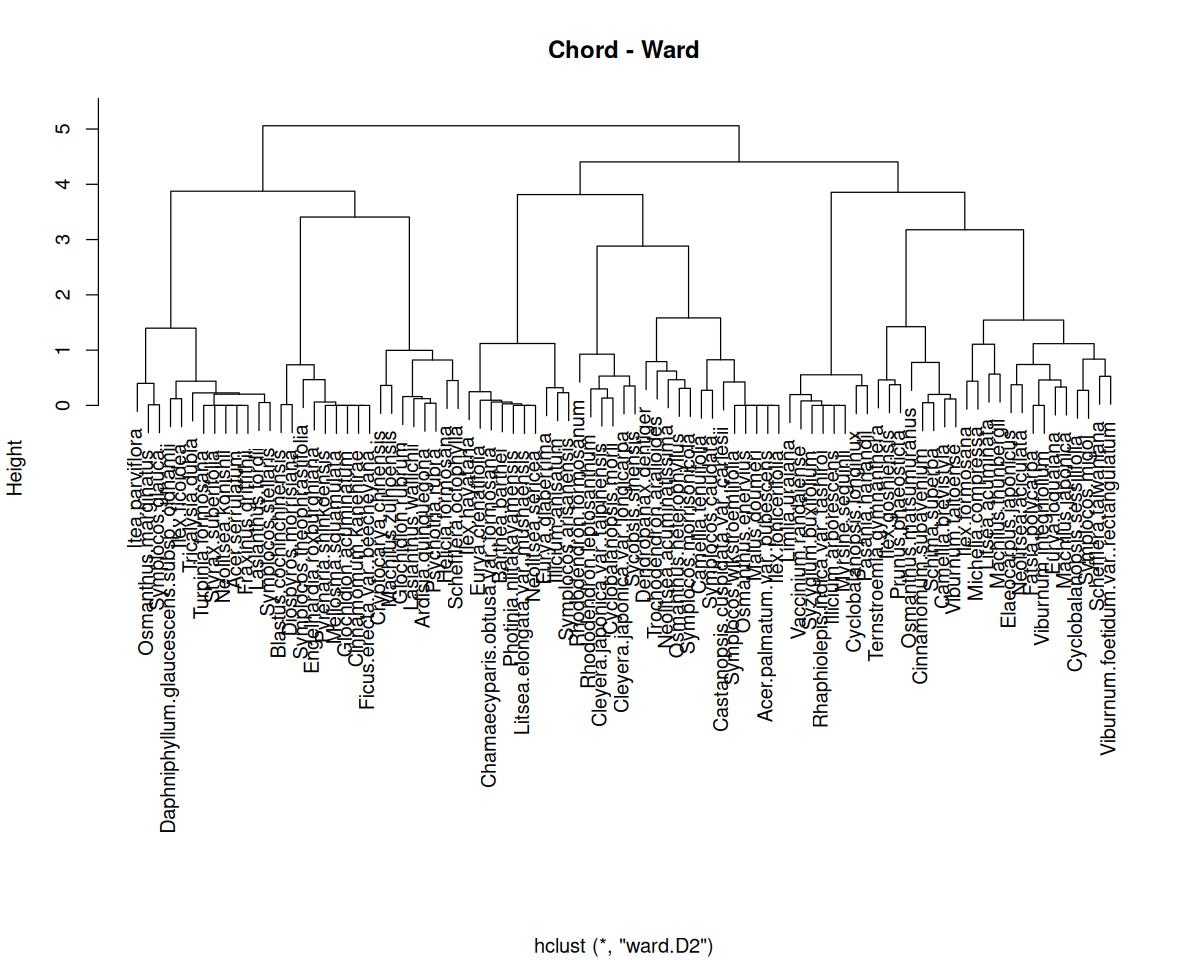

In [16]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

Cophonetic with Ward

In [19]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation for Ward clustering
cor(spe.ch, spe.ch.ward.coph)

[1] 0.8416679

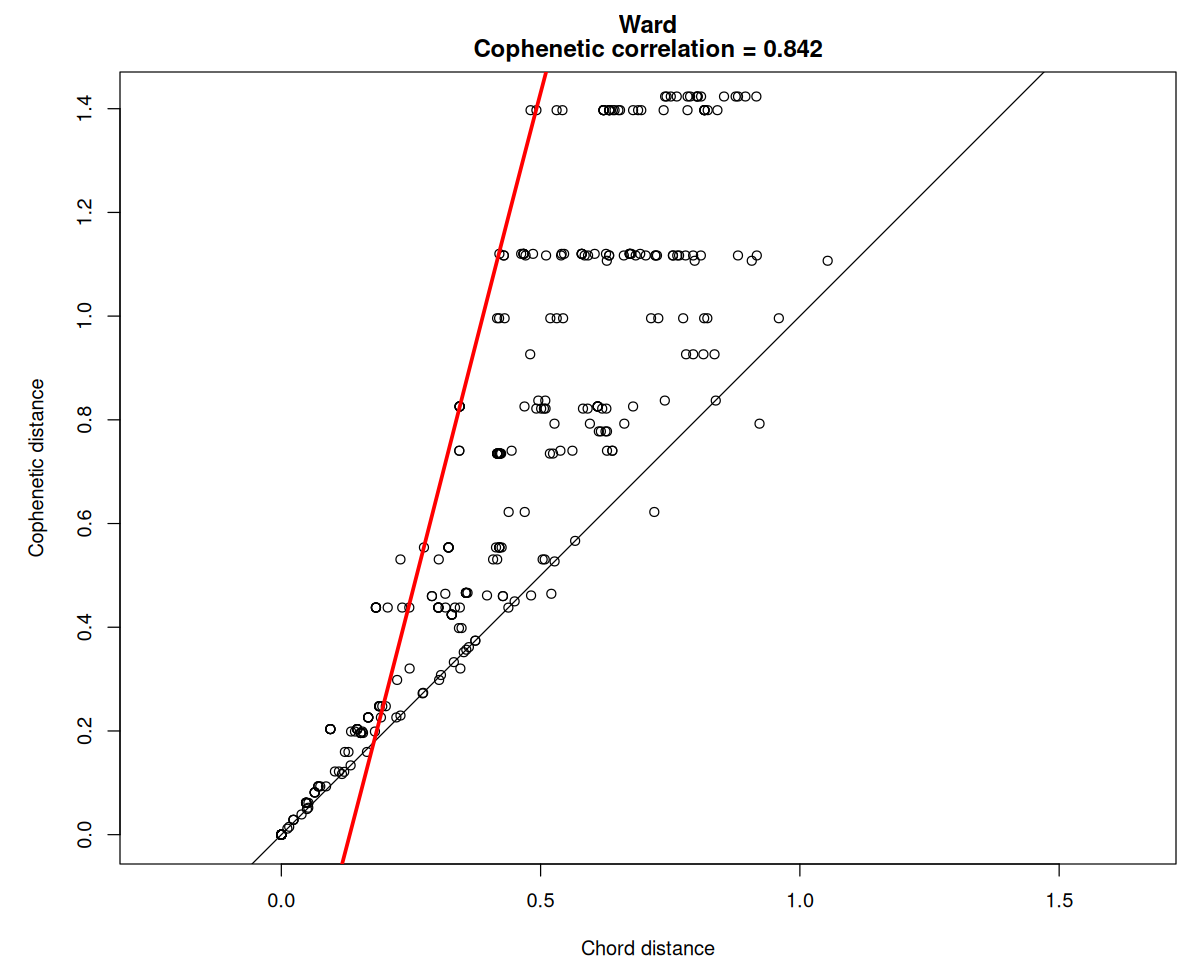

In [21]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.ward.coph, #initial chord distance against cophenetic distance from ward clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Ward", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.ward.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.ward.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

In [27]:
Nb.ward <- NbClust(
  spe,                # Input Spe matrix 
  diss = spe.ch,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "ward.D2",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

In [28]:
Nb.ward

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
4.8886 5.7608 4.7135 4.9374 5.1611 4.6114 4.4493 4.6424 4.1766 3.9693 3.6751 
    13     14     15     16 
3.3828 3.2449 3.1518 3.0099 

$Best.nc
Number_clusters     Value_Index 
         3.0000          5.7608 

$Best.partition
             Acer.palmatum.var..pubescens 
                                        1 
                          Acer.serrulatum 
                                        2 
                      Ardisia.quinquegona 
                                        2 
                          Barthea.barthei 
                                        1 
                  Blastus.cochinchinensis 
                                        2 
                      Camellia.brevistyla 
                                        3 
                      Camellia.tenuifolia 
                                        1 
      Castanopsis.cuspidata.var..carlesii 
                                        1 
      Chamaecyparis.obtusa.var..formosana 
                                        1 
                     Cinnamomum.kanehirae 
                                        2 
                    Cinnamomum.subavenium 
                                        3 
         Cleyera.japonica.var..longicarpa 
                                        1 
        Cleyera.japonica.var..taipinensis 
                                        1 
                    Cryptocarya.chinensis 
                                        2 
                 Cyclobalanopsis.longinux 
                                        3 
                    Cyclobalanopsis.morii 
                                        1 
             Cyclobalanopsis.sessilifolia 
                                        3 
Daphniphyllum.glaucescens.subsp..oldhamii 
                                        2 
                     Dendropanax.dentiger 
                                        1 
                     Diospyros.morrisiana 
                                        2 
                    Elaeocarpus.japonicus 
                                        3 
                 Engelhardia.roxburghiana 
                                        2 
                       Eurya.crenatifolia 
                                        1 
                         Eurya.glaberrima 
                                        1 
                          Eurya.loquaiana 
                                        3 
                         Fatsia.polycarpa 
                                        3 
             Ficus.erecta.var..beecheyana 
                                        2 
                      Fraxinus.griffithii 
                                        2 
                    Glochidion.acuminatum 
                                        2 
                        Glochidion.rubrum 
                                        2 
                        Helicia.formosana 
                                        2 
                            Ilex.ficoidea 
                                        2 
                           Ilex.formosana 
                                        3 
                          Ilex.goshiensis 
                                        3 
                            Ilex.hayatana 
                                        1 
                       Ilex.lonicerifolia 
                                        1 
                        Illicium.anisatum 
                                        1 
                     Illicium.arborescens 
                                        3 
                          Itea.parviflora 
                                        2 
                        Lasianthus.fordii 
                                        2 
                     Lasianthus.wallichii 
                                        2 
                           Limlia.uraiana 
                                        3 
                         Litsea.acuminata 
                           

# Average clusters

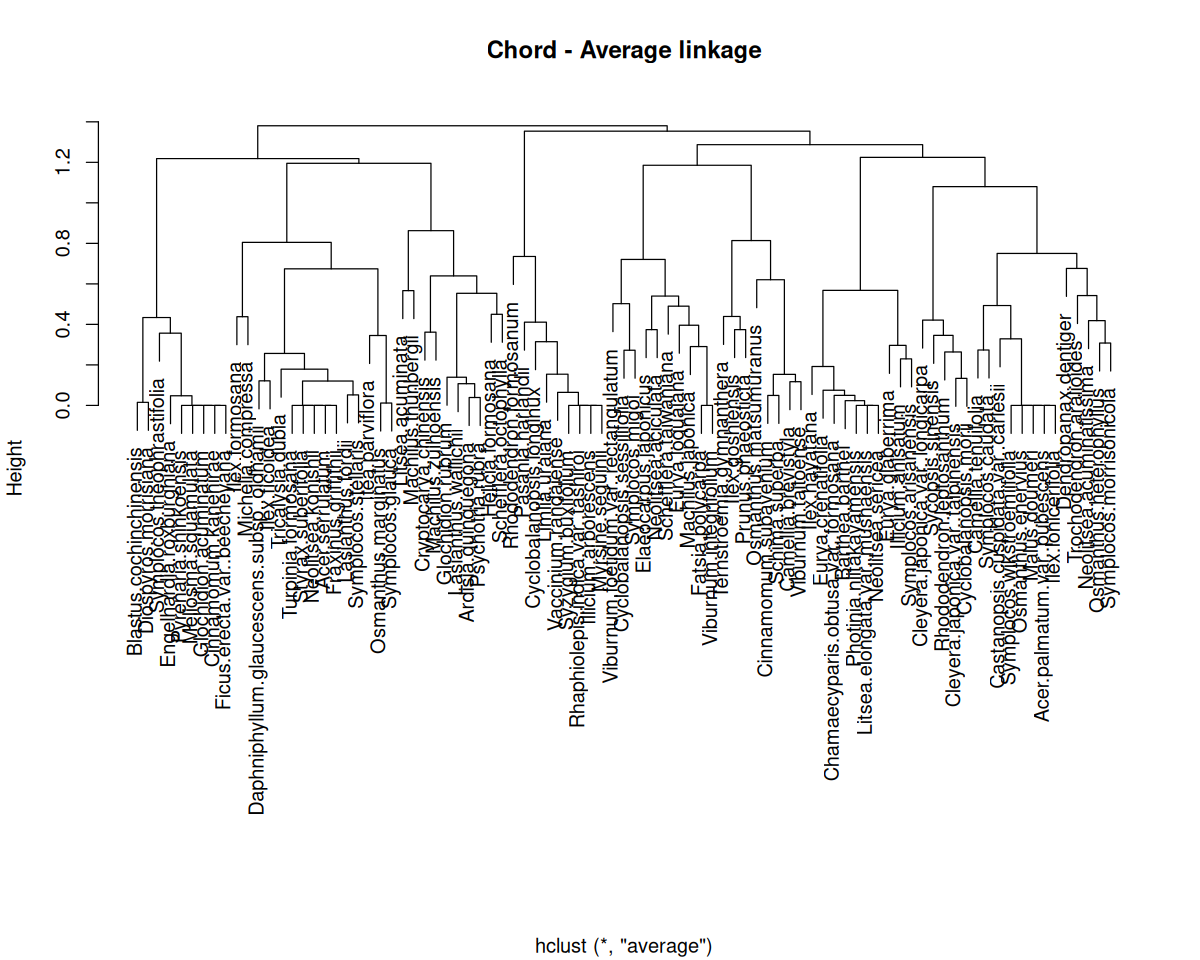

In [23]:
# Compute and plot Average linkage agglomerative clustering
spe.ch.average <- hclust(spe.ch, method = "average")

options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.average,  main = "Chord - Average linkage", xlab="")

In [24]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Average linkage clustering
spe.ch.average.coph <- cophenetic(spe.ch.average)

# Compute the cophenetic correlation for Average linkageclustering
cor(spe.ch, spe.ch.average.coph)

[1] 0.8959209

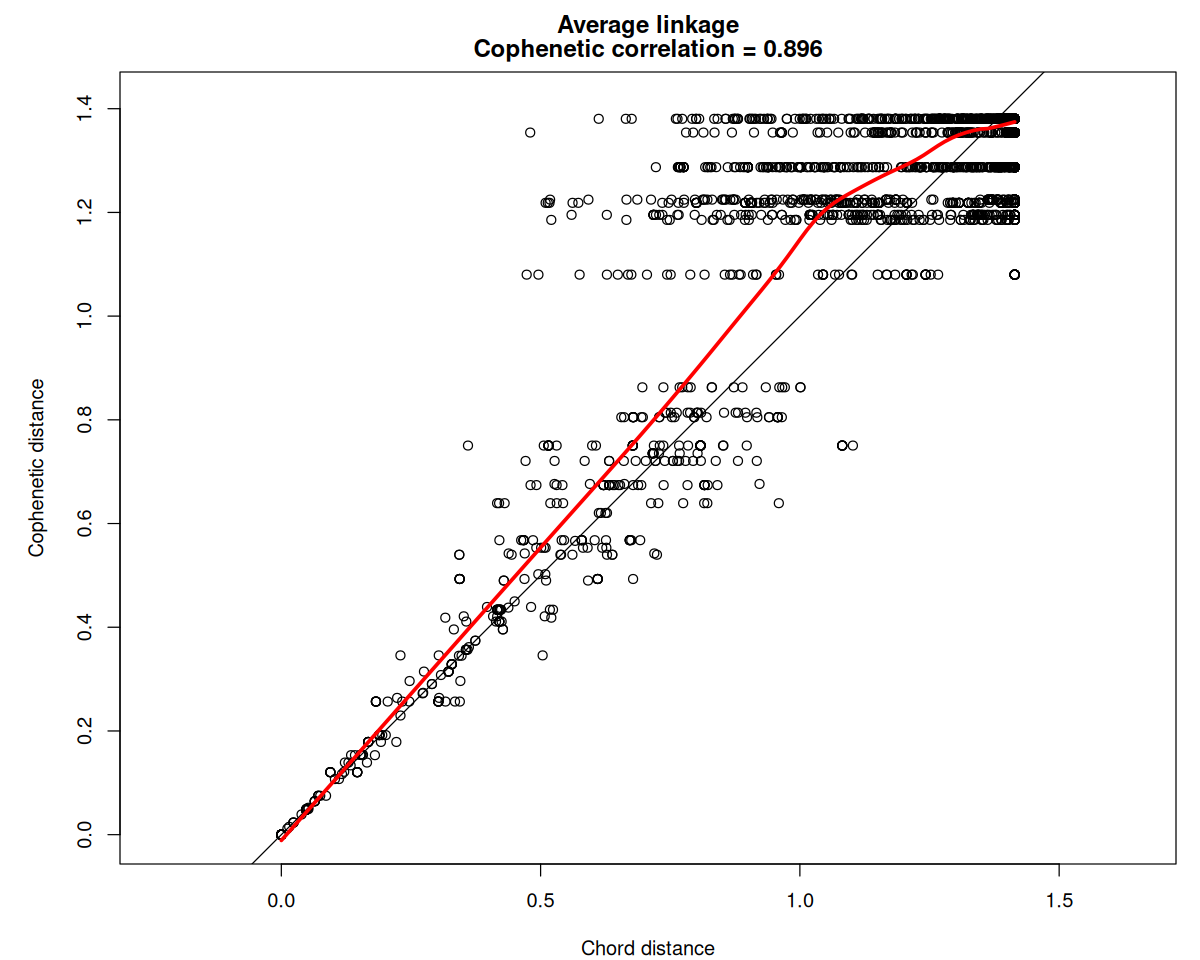

In [25]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.average.coph, #initial chord distance against cophenetic distance from Average linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Average linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.average.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.average.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

In [29]:
Nb.average <- NbClust(
  spe,                # Input Spe matrix 
  diss = spe.ch,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "average",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

In [30]:
Nb.average

$All.index
     2      3      4      5      6      7      8      9     10     11     12 
5.7462 5.6193 5.5711 5.5782 4.8991 4.7573 4.4798 4.6844 4.4315 4.0631 3.7714 
    13     14     15     16 
3.4933 3.2342 3.3034 3.0540 

$Best.nc
Number_clusters     Value_Index 
         2.0000          5.7462 

$Best.partition
             Acer.palmatum.var..pubescens 
                                        1 
                          Acer.serrulatum 
                                        2 
                      Ardisia.quinquegona 
                                        2 
                          Barthea.barthei 
                                        1 
                  Blastus.cochinchinensis 
                                        2 
                      Camellia.brevistyla 
                                        1 
                      Camellia.tenuifolia 
                                        1 
      Castanopsis.cuspidata.var..carlesii 
                                        1 
      Chamaecyparis.obtusa.var..formosana 
                                        1 
                     Cinnamomum.kanehirae 
                                        2 
                    Cinnamomum.subavenium 
                                        1 
         Cleyera.japonica.var..longicarpa 
                                        1 
        Cleyera.japonica.var..taipinensis 
                                        1 
                    Cryptocarya.chinensis 
                                        2 
                 Cyclobalanopsis.longinux 
                                        1 
                    Cyclobalanopsis.morii 
                                        1 
             Cyclobalanopsis.sessilifolia 
                                        1 
Daphniphyllum.glaucescens.subsp..oldhamii 
                                        2 
                     Dendropanax.dentiger 
                                        1 
                     Diospyros.morrisiana 
                                        2 
                    Elaeocarpus.japonicus 
                                        1 
                 Engelhardia.roxburghiana 
                                        2 
                       Eurya.crenatifolia 
                                        1 
                         Eurya.glaberrima 
                                        1 
                          Eurya.loquaiana 
                                        1 
                         Fatsia.polycarpa 
                                        1 
             Ficus.erecta.var..beecheyana 
                                        2 
                      Fraxinus.griffithii 
                                        2 
                    Glochidion.acuminatum 
                                        2 
                        Glochidion.rubrum 
                                        2 
                        Helicia.formosana 
                                        2 
                            Ilex.ficoidea 
                                        2 
                           Ilex.formosana 
                                        2 
                          Ilex.goshiensis 
                                        1 
                            Ilex.hayatana 
                                        1 
                       Ilex.lonicerifolia 
                                        1 
                        Illicium.anisatum 
                                        1 
                     Illicium.arborescens 
                                        1 
                          Itea.parviflora 
                                        2 
                        Lasianthus.fordii 
                                        2 
                     Lasianthus.wallichii 
                                        2 
                           Limlia.uraiana 
                                        1 
                         Litsea.acuminata 
                           